In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from src.features.build_features import KMeans

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [5]:
true_seed_1 = np.array([1., 1., 1.])
true_seed_2 = np.array([3., 3., 3.])
true_seed_3 = np.array([7., 7., 7.])

In [6]:
data_1 = np.array([true_seed_1 + np.random.rand(3) for i in range(10)])
data_2 = np.array([true_seed_2 + np.random.rand(3) for i in range(10)])
data_3 = np.array([true_seed_3 + np.random.rand(3) for i in range(10)])
data = np.vstack([data_1, data_2, data_3])
np.random.shuffle(data)

In [7]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3'])
df.head()

,x1,x2,x3
0,1.008186,1.540028,1.902019
1,7.610478,7.661310,7.344364
2,1.887788,1.577832,1.616635
3,7.749506,7.838561,7.078644
4,3.650520,3.681828,3.953441


In [8]:
scaler = StandardScaler().fit(df.values)
print(scaler.transform(df.values)[:5,:])

[[-1.22891494 -1.08383323 -0.91871887]
 [ 1.37742483  1.37480433  1.28720054]
 [-0.88168078 -1.06864889 -1.03439187]
 [ 1.43230763  1.44599778  1.17949738]
 [-0.18581989 -0.22357076 -0.08722568]]


In [9]:
km = KMeans()

In [10]:
km.fit(df.values, k=3, num_starts=3)

In [11]:
km.predict(df.values)

array([0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 1, 1, 1])

In [12]:
km.error_

0.8977336848544888

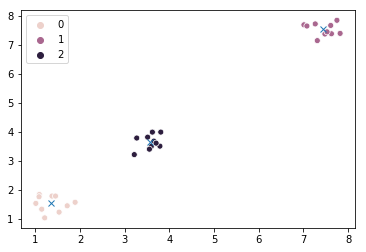

In [13]:
km.plot_km(df.values)

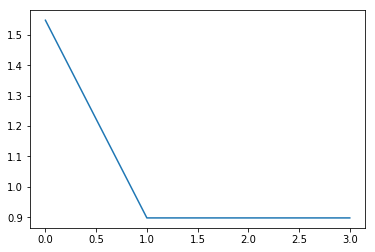

In [14]:
plt.plot(km.error_vs_conv_)

In [15]:
km100 = KMeans()
km100.fit(df.values, k=3, num_starts=100)

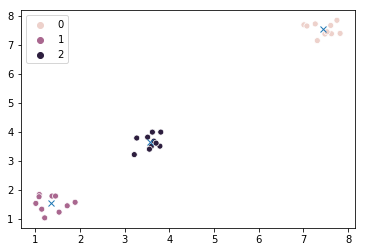

In [16]:
km100.plot_km(df.values)

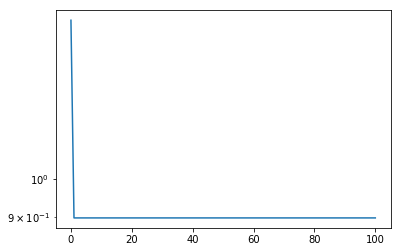

In [17]:
plt.plot(km100.error_vs_conv_)
plt.yscale('log')

In [18]:
km.conv_count_

2

In [25]:
km.intracluster_distance(df.values)

array([0.38894643, 0.27370933, 0.68043461])

In [32]:
km.max_intracluster_distance(df.values)

0.6804346144313164

In [30]:
km.intercluster_distance()

array([[ 0.        , 10.33304817,  3.44389564],
       [10.33304817,  0.        ,  6.92915714],
       [ 3.44389564,  6.92915714,  0.        ]])

In [31]:
km.min_intercluster_distance()

3.4438956359457666